# Game of Thrones Script Generator

## Load Packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import os
import time
import json
import pprint

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

## Load Data

In [2]:
# Data from https://www.kaggle.com/gunnvant/game-of-thrones-srt
DATA_FOLDER = "game-of-thrones-srt"
for f in (os.listdir(DATA_FOLDER)):
    print(f)

season7.json
season4.json
season5.json
season6.json
season1.json
season2.json
season3.json


In [3]:
# Hyperparameters
#vocab_size = 10000
embedding_dim = 16
#max_sequence_len = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [4]:
data = []

for jfile in (os.listdir(DATA_FOLDER)):
    jfile = os.path.join(DATA_FOLDER, jfile)
    if jfile.endswith('.json'):
        with open(jfile) as f:
            script_coll = json.load(f)

            for episode in script_coll:
                #print (episode)
                episode_coll = script_coll[episode]
                for dialogue in episode_coll:
                    #print(episode_coll[dialogue].split(' '))
                    data.append(episode_coll[dialogue])

print(len(data))
#print('There are %d total characters and %d unique characters in your data.' % (data_size, vocab_size))

44890


In [5]:
# Tokenizing data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1
print(total_words)

# create input sequences using list of tokens
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

# Training data
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

# Convert labels to one-hot encodings
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

9716


In [6]:
# Model
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len - 1)) # 1 less because last word of each sequence is used as the label.
model.add((tf.keras.layers.LSTM(20))) # cell state that stores context
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
adam = tf.keras.optimizers.Adam(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [7]:
history = model.fit(xs, ys, epochs=10, verbose=1)
model.summary()

Train on 242402 samples
Epoch 1/10
242402/242402 [==============================] - 88s 364us/sample - loss: 13.2267 - accuracy: 0.0171
Epoch 2/10
242402/242402 [==============================] - 85s 349us/sample - loss: 11.7982 - accuracy: 0.0200
Epoch 3/10
242402/242402 [==============================] - 88s 363us/sample - loss: 11.4118 - accuracy: 0.0225
Epoch 4/10
242402/242402 [==============================] - 87s 359us/sample - loss: 11.7651 - accuracy: 0.0210
Epoch 5/10
242402/242402 [==============================] - 86s 356us/sample - loss: 11.6189 - accuracy: 0.0224
Epoch 6/10
242402/242402 [==============================] - 85s 352us/sample - loss: 11.3180 - accuracy: 0.0253
Epoch 7/10
242402/242402 [==============================] - 89s 369us/sample - loss: 10.7383 - accuracy: 0.0255
Epoch 8/10
242402/242402 [==============================] - 90s 370us/sample - loss: 10.4935 - accuracy: 0.0240
Epoch 9/10
242402/242402 [==============================] - 90s 372us/sample - l

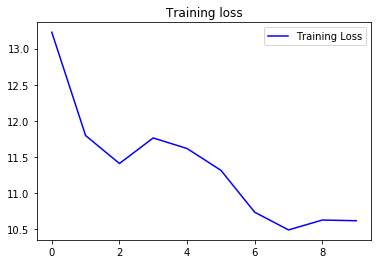

In [9]:
import matplotlib.pyplot as plt
#acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(loss))

#plt.plot(epochs, acc, 'b', label='Training accuracy')
#plt.title('Training accuracy')

#plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "And you will be his queen"
next_words = 5
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

seed_text = "May I "
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

And you will be his queen the wall playing not the
May I  shield the wall stop on this the wall playing not
